In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')


TRANSPARENT = True
MAX_EPISODES = 3200
MOVING_AVERAGE_WINDOW = 100
ENABLE_TITLE = False
out_prefix = 'img_'

rewards = []
q_values = []
losses = []


# Comment the lines from the same source in all metrics, if this is changed
# rewards.append({ 'data':  np.loadtxt('FCv1_rewards.csv'), 'label': 'FCv1',})
# rewards.append({ 'data':  np.loadtxt('FCv2_rewards.csv'), 'label': 'FCv2',})
# rewards.append({ 'data':  np.loadtxt('FC_rewards.csv'), 'label': 'FC'})
# rewards.append({ 'data':  np.loadtxt('CNN_rewards.csv'), 'label': 'CNN'})
rewards.append({ 'data':  np.loadtxt('transfer_pretrained_rewards.csv'), 'label': 'Transferred model'})
rewards.append({ 'data':  np.loadtxt('transfer_raw_rewards.csv'), 'label': 'Fresh model'})

# q_values.append({ 'data': np.loadtxt('FCv1_q.csv'), 'label': 'FCv1_q'})
# q_values.append({ 'data': np.loadtxt('FCv2_q.csv'), 'label': 'FCv2_q'})
# q_values.append({ 'data': np.loadtxt('FC_q.csv'), 'label': 'FC_q'})
# q_values.append({ 'data': np.loadtxt('CNN_q.csv'), 'label': 'CNN_q'})
q_values.append({ 'data': np.loadtxt('transfer_pretrained_q.csv'), 'label': 'Transferred model'})
q_values.append({ 'data': np.loadtxt('transfer_raw_q.csv'), 'label': 'Fresh model'})

# losses.append({ 'data': np.loadtxt('FCv1_loss.csv'), 'label': 'FCv1'})
# losses.append({ 'data': np.loadtxt('FCv2_loss.csv'), 'label': 'FCv2'})
# losses.append({ 'data': np.loadtxt('FC_loss.csv'), 'label': 'FC_loss'})
# losses.append({ 'data': np.loadtxt('CNN_loss.csv'), 'label': 'CNN'})
# losses.append({ 'data': np.loadtxt('transfer_pretrained_loss.csv'), 'label': 'TL_pretrained'})
# losses.append({ 'data': np.loadtxt('transfer_raw_loss.csv'), 'label': 'TL_raw'})

data = {'reward': rewards, 'q-value': q_values, 'loss': losses}


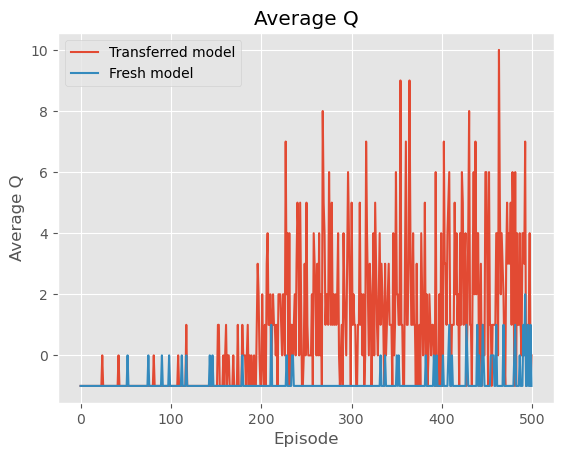

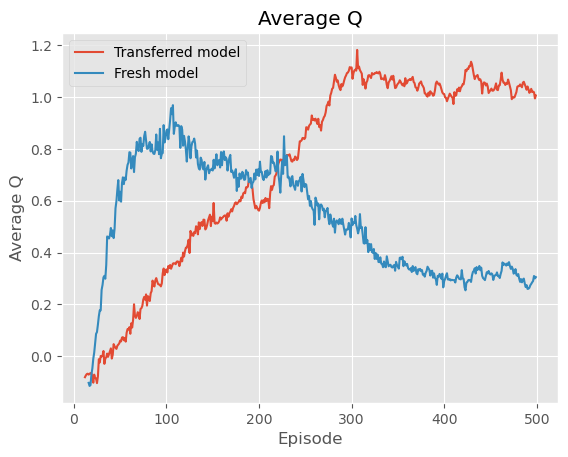

No handles with labels found to put in legend.


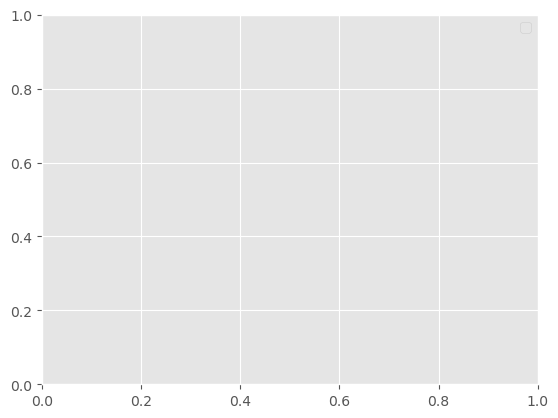

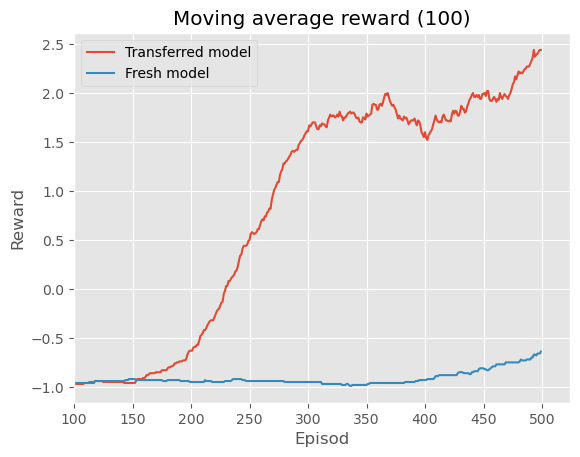

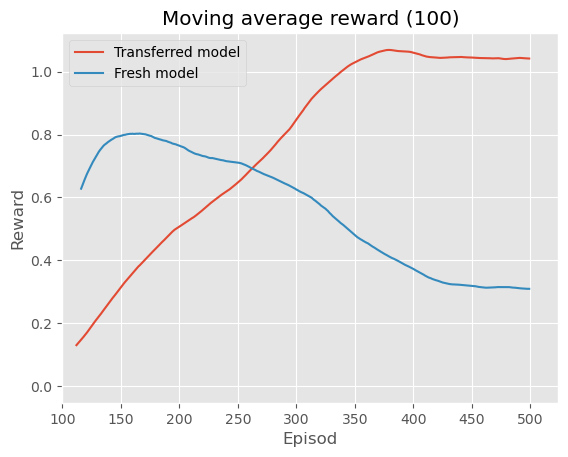

No handles with labels found to put in legend.


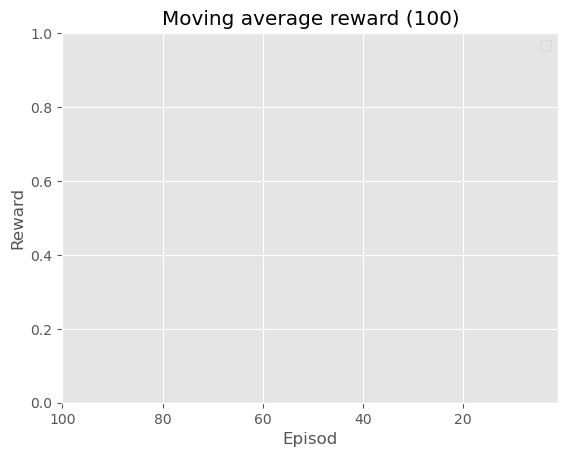

In [32]:
fig = plt.figure()

def plot(data, label, ylabel):
    plt.xlabel('Episode')
    y_label = ylabel[0].upper() + ylabel[1:]
    plt.ylabel(y_label)
    if MAX_EPISODES == 0:
        plt.plot(data, label=label)
    else:
        plt.plot(data[0:MAX_EPISODES], label=label)
        

#Average {q-value,rewards} pr episode
for i, key in enumerate(data):
    if(key == 'loss'):
        continue
    if ENABLE_TITLE: plt.title('Average ' + key + ' pr episode (raw)')
    for d in data[key]:
        plot(d['data'],d['label'],key)
    plt.title("Average Q")
    plt.ylabel('Average Q')
    plt.xlabel('Episode')
    plt.legend()
    plt.show()
    fig.savefig(out_prefix + 'Average_' + key + '_pr_episode.png',transparent=TRANSPARENT)

# Average loss pr episode
if ENABLE_TITLE: plt.title('Average loss pr episode')
for d, obj in enumerate(data['loss']):
    episodes = len(data['reward'][d]['data'])
    dataPoints = len(obj['data'])
    points_pr_episode = int(dataPoints/episodes)
    new_average = []
    for i in range(0, episodes):
        new_average.append(np.mean(obj['data'][i*points_pr_episode:(i+1)*points_pr_episode]))
    obj['data'] = new_average
    plot(obj['data'],obj['label'],'loss')

plt.legend()
plt.show()
fig.savefig(out_prefix + 'Average_loss_pr_episode.png',transparent=TRANSPARENT)

    
# Moving average

for i, key in enumerate(data):
    for d, obj in enumerate(data[key]):
        obj['moving_average'] = []
        for j in range(0, len(obj['data'])):   
            if j >= MOVING_AVERAGE_WINDOW:
                obj['moving_average'].append(np.mean(obj['data'][j-MOVING_AVERAGE_WINDOW:j])) 
            else:
                data[key][d]['moving_average'].append(0)
        plot(obj['moving_average'],obj['label'],key)
    if ENABLE_TITLE: plt.title(key + ' (moving average over past ' + str(MOVING_AVERAGE_WINDOW) + ' episodes)')
    plt.legend()
    plt.title("Moving average reward (100)")
    plt.xlabel("Episod")
    plt.ylabel("Reward")
    plt.xlim(left=MOVING_AVERAGE_WINDOW)
    plt.show()
    fig.savefig(out_prefix + 'MovingAverage_' + key + '_pr_episode.png',transparent=TRANSPARENT)


<StemContainer object of 3 artists>

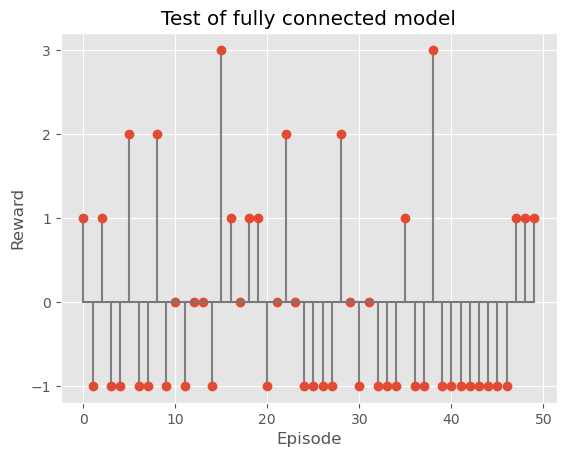

In [45]:
results_FC = np.loadtxt("results_FC.csv")
results_CNN = np.loadtxt("results_CNN.csv")
plt.style.use('ggplot')

plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title("Test of fully connected model")
plt.stem(results_FC, linefmt='grey')

<StemContainer object of 3 artists>

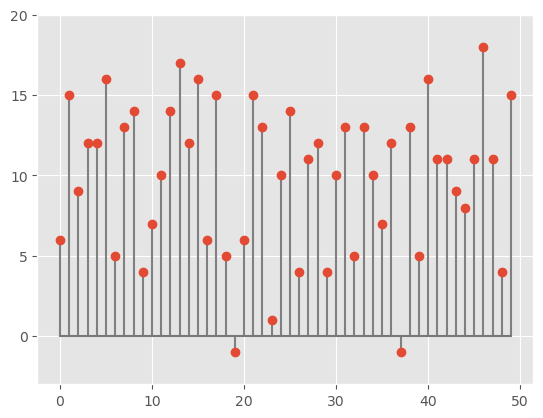

In [42]:
plt.locator_params(axis="both", integer=True, tight=True)
plt.ylim(-3, 20)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title("Test of CNN model")
plt.stem(results_CNN, linefmt='grey')